In [0]:
# get text data from url

import urllib.request
stringInURL = "https://www.gutenberg.org/cache/epub/27897/pg27897.txt"

urllib.request.urlretrieve(stringInURL, "/tmp/puneeth_bigdatafinalproject.txt")

Out[1]: ('/tmp/puneeth_bigdatafinalproject.txt',
 <http.client.HTTPMessage at 0x7fbdeb339e80>)

In [0]:
dbutils.fs.mv("file:/tmp/puneeth_bigdatafinalproject.txt","dbfs:/data/puneeth_bigdatafinalproject.txt")

Out[2]: True

In [0]:

# Tranfering the file to the Spark job.
rawRDD = sc.textFile("dbfs:/data/puneeth_bigdatafinalproject.txt")

In [0]:
# Splitting the words with the " " and conevrting them into the lower case.
wordsRDD = rawRDD.flatMap(lambda line : line.lower().strip().split(" "))

In [0]:

# map() words to (words,1) intermediate key-value pairs.
import re
# removing punctutations.
cleanToken_RDD = wordsRDD.map(lambda words: re.sub(r'[^a-zA-Z]','',words))
#prepare to clean stopwords
from pyspark.ml.feature import StopWordsRemover
remove =StopWordsRemover()
stopWords = remove.getStopWords()
wordsRDD=cleanToken_RDD.filter(lambda wrds: wrds not in stopWords)
# Removing the spaces/emptywords
word_count_RDD = cleanData_RDD.filter(lambda x: x != "")
#maps the words to key value pairs
IKVPairsRDD= word_count_RDD.map(lambda word: (word,1))

In [0]:
# Converting the keyvalue pairs to word count.
word_count_RDD = IKVPairsRDD.reduceByKey(lambda acc, value: acc+value)

In [0]:
# Sorting the words in the descending order and printing the results to check the first 40 results in descending order.
first_results = word_count_RDD.map(lambda x: (x[1], x[0])).sortByKey(False).take(40)
print(first_results)

[(1188, 'said'), (691, 'dickenson'), (627, 'sir'), (561, 'lennox'), (411, 'one'), (394, 'sergeant'), (368, 'yes'), (368, 'men'), (351, 'well'), (319, 'man'), (312, 'dont'), (270, 'roby'), (267, 'captain'), (262, 'cried'), (255, 'colonel'), (239, 'like'), (236, 'right'), (228, 'back'), (226, 'say'), (220, 'boers'), (218, 'upon'), (213, 'go'), (208, 'two'), (204, 'see'), (192, 'must'), (185, 'way'), (184, 'come'), (184, 'time'), (182, 'get'), (179, 'oh'), (170, 'know'), (165, 'think'), (160, 'away'), (159, 'look'), (159, 'us'), (153, 'till'), (149, 'old'), (145, 'im'), (144, 'came'), (144, 'made')]

In [0]:
# collect() action to get back to Python
results = word_count_RDD.collect()
print(results)

[('project', 87), ('gutenberg', 29), ('ebook', 10), ('george', 7), ('manville', 6), ('use', 40), ('anyone', 5), ('anywhere', 8), ('restrictions', 2), ('whatsoever', 2), ('may', 116), ('give', 97), ('away', 160), ('reuse', 2), ('online', 4), ('title', 1), ('story', 8), ('illustrator', 1), ('boucher', 1), ('january', 1), ('language', 4), ('start', 28), ('produced', 5), ('england', 4), ('chapter', 39), ('lennox', 561), ('bob', 60), ('afishing', 1), ('look', 159), ('like', 239), ('two', 208), ('young', 142), ('go', 213), ('instead', 18), ('africa', 5), ('african', 5), ('take', 128), ('bait', 9), ('talking', 40), ('reached', 27), ('bank', 10), ('lovely', 4), ('whose', 35), ('cliffs', 1), ('consequent', 4), ('upon', 218), ('cutting', 7), ('way', 185), ('earth', 11), ('luxuriantly', 1), ('green', 7), ('refreshed', 2), ('eyes', 73), ('lookerson', 2), ('months', 4), ('drab', 1), ('veldt', 32), ('tackle', 2), ('said', 1188), ('goodlooking', 1), ('always', 34), ('stupid', 7), ('aspect', 2), ('think', 165), ('crocodiles', 2), ('likely', 34), ('bobby', 9), ('suppose', 58), ('resembled', 1), ('companion', 20), ('minus', 4), ('keen', 5), ('bobbyotherwise', 1), ('robert', 2), ('magnified', 1), ('efts', 1), ('swallows', 1), ('let', 98), ('line', 59), ('know', 170), ('yes', 368), ('officer', 104), ('quite', 127), ('say', 226), ('though', 77), ('turned', 84), ('hippopotamus', 1), ('long', 95), ('nice', 14), ('fat', 6), ('calf', 1), ('im', 145), ('ragingly', 1), ('hungry', 13), ('gentlemen', 32), ('greatest', 6), ('delicacy', 1), ('sun', 26), ('oh', 179), ('nonsense', 27), ('things', 37), ('wouldnt', 32), ('chap', 33), ('fish', 17), ('caught', 28), ('idea', 23), ('heres', 16), ('looks', 13), ('fishes', 2), ('live', 17), ('shouldnt', 15), ('sure', 47), ('looking', 51), ('tench', 1), ('eels', 1), ('pike', 1), ('probably', 8), ('kind', 12), ('mahseer', 1), ('perhapseh', 1), ('bah', 20), ('make', 130), ('woody', 1), ('rift', 9), ('got', 125), ('must', 192), ('try', 60), ('thought', 78), ('bring', 43), ('sea', 2), ('never', 85), ('chance', 40), ('eh', 9), ('bringing', 9), ('rifle', 62), ('carried', 28), ('ready', 105), ('boers', 220), ('approach', 15), ('perhaps', 34), ('put', 34), ('antelope', 1), ('buck', 2), ('something', 102), ('venison', 2), ('hot', 33), ('pray', 4), ('gave', 50), ('pst', 5), ('quiet', 33), ('anything', 49), ('dare', 19), ('wounded', 71), ('touch', 21), ('fever', 7), ('run', 31), ('risk', 12), ('starved', 2), ('us', 159), ('bag', 12), ('wooded', 2), ('gully', 8), ('cautiously', 2), ('descend', 7), ('proved', 11), ('caution', 2), ('elder', 1), ('tone', 25), ('doggylooking', 1), ('theyd', 13), ('surprised', 7), ('disappointments', 1), ('prophesying', 1), ('ill', 93), ('help', 83), ('hang', 27), ('weve', 45), ('ever', 39), ('came', 144), ('close', 79), ('getting', 64), ('forgot', 4), ('speaker', 15), ('took', 54), ('unscrewed', 1), ('lid', 1), ('pocketknife', 1), ('nasty', 5), ('stickylooking', 1), ('paste', 3), ('looked', 54), ('hook', 6), ('placed', 14), ('separated', 3), ('stations', 1), ('apart', 6), ('stones', 31), ('rapid', 6), ('current', 3), ('washed', 5), ('around', 13), ('advantageous', 2), ('baited', 1), ('water', 90), ('fishers', 1), ('bend', 3), ('apparently', 12), ('caused', 8), ('rush', 31), ('rippling', 2), ('amongst', 19), ('beneath', 13), ('music', 1), ('paid', 11), ('sat', 15), ('waiting', 39), ('tug', 4), ('tell', 79), ('work', 102), ('good', 141), ('ten', 28), ('minutes', 44), ('elapsed', 6), ('sign', 21), ('humph', 19), ('grunted', 8), ('exhausted', 9), ('mistake', 9), ('lips', 26), ('pulled', 9), ('sound', 58), ('ear', 11), ('dangled', 1), ('right', 236), ('rebaited', 1), ('dropped', 23), ('marble', 1), ('drawing', 22), ('rings', 3), ('carefully', 19), ('heavy', 28), ('streamwashed', 1), ('slaty', 1), ('end', 65), ('opened', 16), ('brow', 4), ('puckered', 1), ('disconsolately', 1), ('contents', 2), ('last', 101), ('em', 20), ('byandby', 4), ('replaced', 4), ('hardest', 1), ('job', 15), ('muttered', 19), ('self

count word
0 1188 said
1 691 dickenson
2 627 sir
3 561 lennox
4 411 one
5 394 sergeant
6 368 yes
7 368 men
8 351 well
9 319 man
10 312 dont
11 270 roby
12 267 captain
13 262 cried
14 255 colonel
15 239 like
16 236 right
17 228 back
18 226 say
19 220 boers
20 218 upon
21 213 go
22 208 two
23 204 see
24 192 must
25 185 way
26 184 come
27 184 time
28 182 get
29 179 oh
30 170 know
31 165 think
32 160 away
33 159 look
34 159 us
35 153 till
36 149 old
37 145 im
38 144 came
39 144 made
Out[80]:

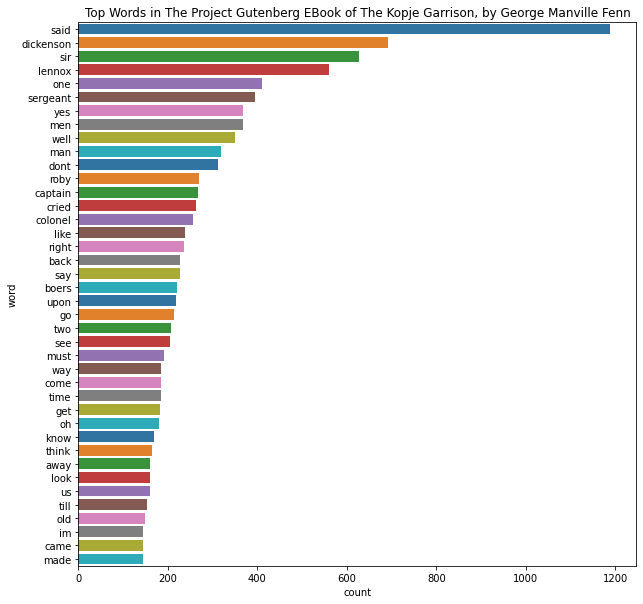

Text(0.5, 1.0, 'Top Words in The Project Gutenberg EBook of The Kopje Garrison, by George Manville Fenn')

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# more about Numpy from: https://numpy.org/
# more about pandas from: https://pandas.pydata.org/
# more about Matplotlib from: https://matplotlib.org/
# more about Seaborn from: https://seaborn.pydata.org/
# more about Python collections Counter from: https://docs.python.org/3/library/collections.html#collections.Counter

# Shows how to chart results after collect() into Python DS

# We already have a list of tuples after processing
# Use collect() to get back a Python datastructure

# prepare chart information
source = 'The Project Gutenberg EBook of The Kopje Garrison, by George Manville Fenn'
title = 'Top Words in ' + source
xlabel = 'count'
ylabel = 'word'

# create Pandas dataframe from list of tuples
df = pd.DataFrame.from_records(first_results, columns =[xlabel, ylabel]) 
print(df)

# create plot (using matplotlib)
plt.figure(figsize=(10,10))
sns.barplot(xlabel, ylabel, data=df, palette="tab10").set_title(title)